/tmp/ipykernel_36231/1395398594.py:11: DtypeWarning: Columns (28,30,32,34,36,38,40,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  steamboat_climate_df = pd.read_csv(SteamboatClimateURL,


Missing TMAX values: 376
Date range: 1893-02-01 00:00:00 to 2024-09-18 00:00:00


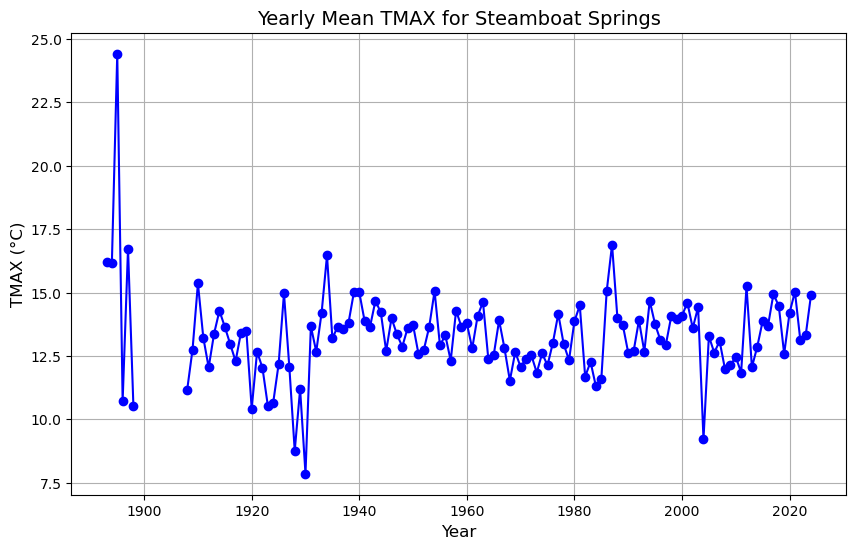

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Google Drive file ID (update with your own file ID)
file_id = '1tXD2YGxhEwXQ83UDxvad_co0fUc4Dn9m'

# Create a URL for direct download
SteamboatClimateURL = f'https://drive.google.com/uc?id={file_id}'

# Read the data from the CSV file
steamboat_climate_df = pd.read_csv(SteamboatClimateURL,
                                   index_col='DATE', 
                                   parse_dates=True, 
                                   na_values=['NaN'])

# Ensure that the index is properly converted to DatetimeIndex
steamboat_climate_df.index = pd.to_datetime(steamboat_climate_df.index, errors='coerce')

# Check for missing data in TMAX
print("Missing TMAX values:", steamboat_climate_df['TMAX'].isna().sum())

# Drop rows where TMAX is NaN to avoid issues with plotting
steamboat_climate_df = steamboat_climate_df.dropna(subset=['TMAX'])

# Check the date range of the data to ensure it continues past 1898
print("Date range:", steamboat_climate_df.index.min(), "to", steamboat_climate_df.index.max())

# Resample data to yearly frequency and calculate the mean for TMAX
steamboat_yearly_mean_df = steamboat_climate_df['TMAX'].resample('YS').mean()

# Plot the yearly mean of TMAX
plt.figure(figsize=(10, 6))
plt.plot(steamboat_yearly_mean_df.index, steamboat_yearly_mean_df, marker='o', linestyle='-', color='b')
plt.title('Yearly Mean TMAX for Steamboat Springs', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('TMAX (°C)', fontsize=12)
plt.grid(True)
plt.show()


This data appears to be unreliable prior to 1908